# Symbol Analysis in Communication Dataset

This notebook performs a detailed analysis of symbolic elements detected in a communication-related dataset.

## Objectives

- Merge main metadata with symbol detection results.
- Analyze frequency and distribution of detected visual symbols.
- Explore relationships between symbols and other features such as:
  - Villains
  - Domains
  - Heroes
  - Years
  - Communication goals

## Workflow Summary

1. **Data Loading**:  
   - Load the main dataset (`data-2324-no-ver.csv`).
   - Load the symbol detection results (`symbols_detected_over_090_detailed.csv`).

2. **Preprocessing**:  
   - Extract `incident_id` from image filenames.
   - Merge symbol data with the main metadata using `incident_id`.

3. **Symbol Analysis**:  
   - Parse and explode the list of detected symbols.
   - Count symbol occurrences.
   - Group and cross-tabulate symbols against other categorical fields.

4. **Visualization**:  
   - Generate bar plots showing symbol frequencies.
   - Display detailed contingency tables for symbol interactions with other variables.

5. **Filtering**:  
   - Focus the analysis on the top 10 most frequent categories per variable for clearer plots.

## Tools Used

- **Pandas** for data manipulation.
- **Matplotlib** for visualizations.
- **AST** for parsing stringified lists.

## Applications

This analysis helps understand how symbolic representations are used across different narrative elements in the dataset and can support further tasks such as content classification or semiotics research.

In [1]:
import pandas as pd
df=pd.read_csv('data/data-2324-no-ver.csv')
df.head()

,Unnamed: 0,incident_id,report_id,date_coded,url,file,screenshot,date_posted,format,transcript,...,text_around_deepfake,harm_evidence,communication_goal,core_frame,hero,villain,plot,moral,domain,year
0,0,203,17,2024-02-12,https://twitter.com/DouglasLucas/status/171631...,Screenshot 2024-02-12 at 12.47.24 PM.png (http...,NaN,2023-10-23,image,NaN,...,AI and the end of photographic truth? Deceptiv...,political_interference,education,human_interest,Joe Biden,Putin,Putin and Biden hugging,U.S. and Russian leaders can get along,twitter.com,2023.0
1,1,186,18,2024-02-04,https://twitter.com/21WIRE/status/165300993699...,"""Patrick Henningsen on X_ _⭕️ Granted, this mu...",NaN,2023-05-01,video,"""Today is today, and yesterday was today yeste...",...,"⭕️ Granted, this must be a deep fake, but rega...",non_identifiable,"satire,entertainment,harm_reputation",human_interest,A Leader Who Sounds Smart and Capable During S...,Kamala Harris Rambling and Not Making Sense Du...,"Kamala's speech does not make sense, which lea...",Kamala Harris's credibility as VP should be qu...,twitter.com,2023.0
2,2,187,19,2024-02-05,https://www.facebook.com/reel/894486844951526,deepfake 19.html (https://v5.airtableuserconte...,NaN,2023-05-03,video,"“Today is today, and yesterday is today yester...",...,"""Our VP: 'I can only hit this bong 1 more time...",other,"satire,entertainment,harm_reputation",human_interest,Intelligent Manner. and People Expect That A C...,Online Users Believe That Harris Is A Rambler.,Kamala Harris is shown to be giving a speech t...,Kamala Harris is portrayed as being unable to ...,www.facebook.com,2023.0
3,3,188,20,2024-02-05,https://twitter.com/JebraFaushay/status/165937...,Deepfake 20.html (https://v5.airtableuserconte...,NaN,2023-05-18,video,"""Excuse me, excuse me. I need everyone in the ...",...,Is this real? I feel like it might be a deep f...,other,"satire,entertainment,harm_reputation","conflict,human_interest",His Squad To Dress In Drag. and The Freedom Fo...,Republicans Who Want To Ban Drag.,"Republicans want to ban drag, but Donald Trump...",Republicans should stop calling for drag to be...,twitter.com,2023.0
4,4,201,25,2024-02-09,https://twitter.com/JackPosobiec/status/163383...,Screenshot 2024-02-09 134519.png (https://v5.a...,NaN,2023-03-09,video,I'll tell you something the deepfake that Jack...,...,"""The deepfake that Jack Posobiec made of Presi...",political_interference,"entertainment,harm_political_interference,acti...","responsibility,conflict","Poso'S Supposters, Those Who Share His Ideology","Aoc, and Other Related Gov. Officials Who Shar...",Biden and AOC do not understand how to priorit...,we must take a stand against their choices to ...,twitter.com,2023.0


In [2]:
symbol_df = pd.read_csv('symbols_detected_over_090_detailed.csv')
symbol_df.head()

,image,detected_symbols
0,994.png,['police']
1,670.jpeg,['communist symbol']
2,148.jpeg,['prisoner']
3,180.jpeg,['prisoner']
4,153.jpeg,['prisoner']


In [4]:
symbol_df["incident_id"] = symbol_df["image"].str.extract(r"(\d+)")
symbol_df["incident_id"] = symbol_df["incident_id"].astype(int)
symbol_df.head()

,image,detected_symbols,incident_id
0,994.png,['police'],994
1,670.jpeg,['communist symbol'],670
2,148.jpeg,['prisoner'],148
3,180.jpeg,['prisoner'],180
4,153.jpeg,['prisoner'],153


In [5]:
merged_df = df.merge(symbol_df, on="incident_id", how="left")

In [6]:
merged_df.head()

,Unnamed: 0,incident_id,report_id,date_coded,url,file,screenshot,date_posted,format,transcript,...,communication_goal,core_frame,hero,villain,plot,moral,domain,year,image,detected_symbols
0,0,203,17,2024-02-12,https://twitter.com/DouglasLucas/status/171631...,Screenshot 2024-02-12 at 12.47.24 PM.png (http...,NaN,2023-10-23,image,NaN,...,education,human_interest,Joe Biden,Putin,Putin and Biden hugging,U.S. and Russian leaders can get along,twitter.com,2023.0,NaN,NaN
1,1,186,18,2024-02-04,https://twitter.com/21WIRE/status/165300993699...,"""Patrick Henningsen on X_ _⭕️ Granted, this mu...",NaN,2023-05-01,video,"""Today is today, and yesterday was today yeste...",...,"satire,entertainment,harm_reputation",human_interest,A Leader Who Sounds Smart and Capable During S...,Kamala Harris Rambling and Not Making Sense Du...,"Kamala's speech does not make sense, which lea...",Kamala Harris's credibility as VP should be qu...,twitter.com,2023.0,NaN,NaN
2,2,187,19,2024-02-05,https://www.facebook.com/reel/894486844951526,deepfake 19.html (https://v5.airtableuserconte...,NaN,2023-05-03,video,"“Today is today, and yesterday is today yester...",...,"satire,entertainment,harm_reputation",human_interest,Intelligent Manner. and People Expect That A C...,Online Users Believe That Harris Is A Rambler.,Kamala Harris is shown to be giving a speech t...,Kamala Harris is portrayed as being unable to ...,www.facebook.com,2023.0,NaN,NaN
3,3,188,20,2024-02-05,https://twitter.com/JebraFaushay/status/165937...,Deepfake 20.html (https://v5.airtableuserconte...,NaN,2023-05-18,video,"""Excuse me, excuse me. I need everyone in the ...",...,"satire,entertainment,harm_reputation","conflict,human_interest",His Squad To Dress In Drag. and The Freedom Fo...,Republicans Who Want To Ban Drag.,"Republicans want to ban drag, but Donald Trump...",Republicans should stop calling for drag to be...,twitter.com,2023.0,NaN,NaN
4,4,201,25,2024-02-09,https://twitter.com/JackPosobiec/status/163383...,Screenshot 2024-02-09 134519.png (https://v5.a...,NaN,2023-03-09,video,I'll tell you something the deepfake that Jack...,...,"entertainment,harm_political_interference,acti...","responsibility,conflict","Poso'S Supposters, Those Who Share His Ideology","Aoc, and Other Related Gov. Officials Who Shar...",Biden and AOC do not understand how to priorit...,we must take a stand against their choices to ...,twitter.com,2023.0,NaN,NaN


In [7]:
from collections import Counter

all_symbols = merged_df['detected_symbols'].dropna().explode()
symbol_counts = all_symbols.value_counts()
print(symbol_counts)

detected_symbols
['prisoner']                        33
['communist symbol']                32
['army']                            31
['police']                          30
['american flag']                   21
['army', 'communist symbol']         6
['rainbow pride flag']               4
['police', 'prisoner']               2
['rainbow pride flag', 'police']     1
['communist symbol', 'prisoner']     1
Name: count, dtype: int64


detected_symbols
communist symbol      39
army                  37
prisoner              36
police                33
american flag         21
rainbow pride flag     5
Name: count, dtype: int64


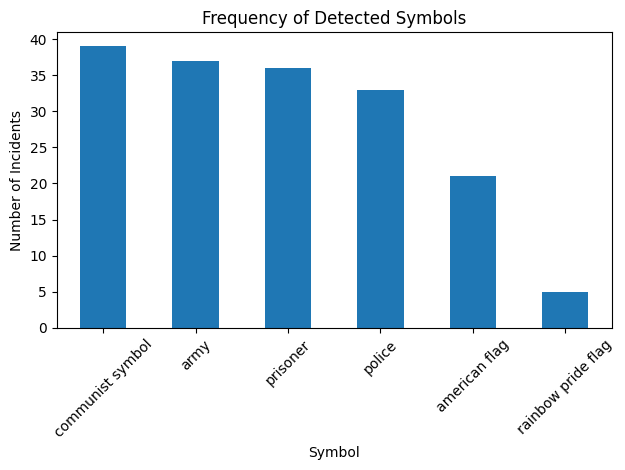

In [12]:
import pandas as pd
import ast
# Assume merged_df is your merged DataFrame

# Step 1: Explode the 'detected_symbols' list into individual rows
merged_df['detected_symbols'] = merged_df['detected_symbols'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Now explode the list into individual symbols
exploded_df = merged_df.explode('detected_symbols')

# Count individual symbol frequencies
symbol_counts = exploded_df['detected_symbols'].value_counts()
print(symbol_counts)

# Step 3: Analyze each symbol against other fields (example: 'villain')
symbol_vs_villain = exploded_df.groupby(['detected_symbols', 'villain']).size().unstack(fill_value=0)
symbol_vs_domain = exploded_df.groupby(['detected_symbols', 'domain']).size().unstack(fill_value=0)
symbol_vs_hero = exploded_df.groupby(['detected_symbols', 'hero']).size().unstack(fill_value=0)
symbol_vs_year = exploded_df.groupby(['detected_symbols', 'year']).size().unstack(fill_value=0)
symbol_vs_goal = exploded_df.groupby(['detected_symbols', 'communication_goal']).size().unstack(fill_value=0)


import matplotlib.pyplot as plt

symbol_counts.plot(kind='bar', title='Frequency of Detected Symbols')
plt.ylabel('Number of Incidents')
plt.xlabel('Symbol')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [13]:
print("Symbol vs Villain:\n", symbol_vs_villain)
print("\nSymbol vs Domain:\n", symbol_vs_domain)
print("\nSymbol vs Hero:\n", symbol_vs_hero)
print("\nSymbol vs Year:\n", symbol_vs_year)
print("\nSymbol vs Communication Goal:\n", symbol_vs_goal)

Symbol vs Villain:
 villain             Aoc  Deceptive Ai Images  Donald Trump  Grok 2  \
detected_symbols                                                     
american flag         1                    1             2       1   
army                  0                    0             4       0   
communist symbol      0                    0             4       0   
police                0                    0            12       0   
prisoner              0                    0            23       0   
rainbow pride flag    0                    0             1       0   

villain             Harris-Walz Campaign  Joe Biden  Kamala Harris  Na  \
detected_symbols                                                         
american flag                          1          1              1   1   
army                                   0          3             17   0   
communist symbol                       0          0             22   0   
police                                 0         

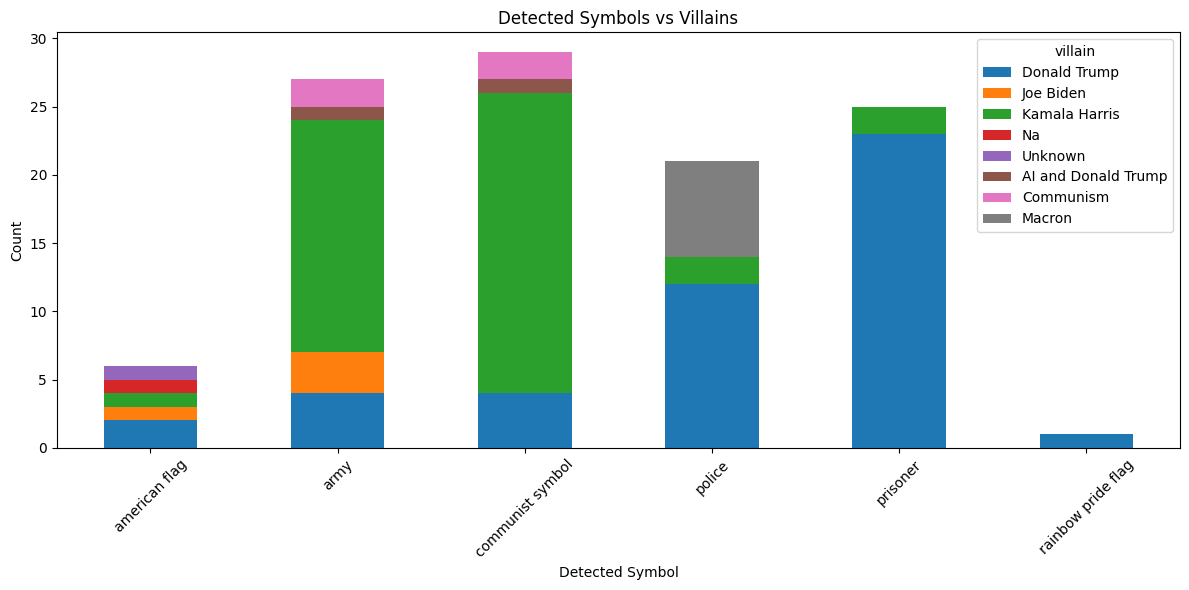

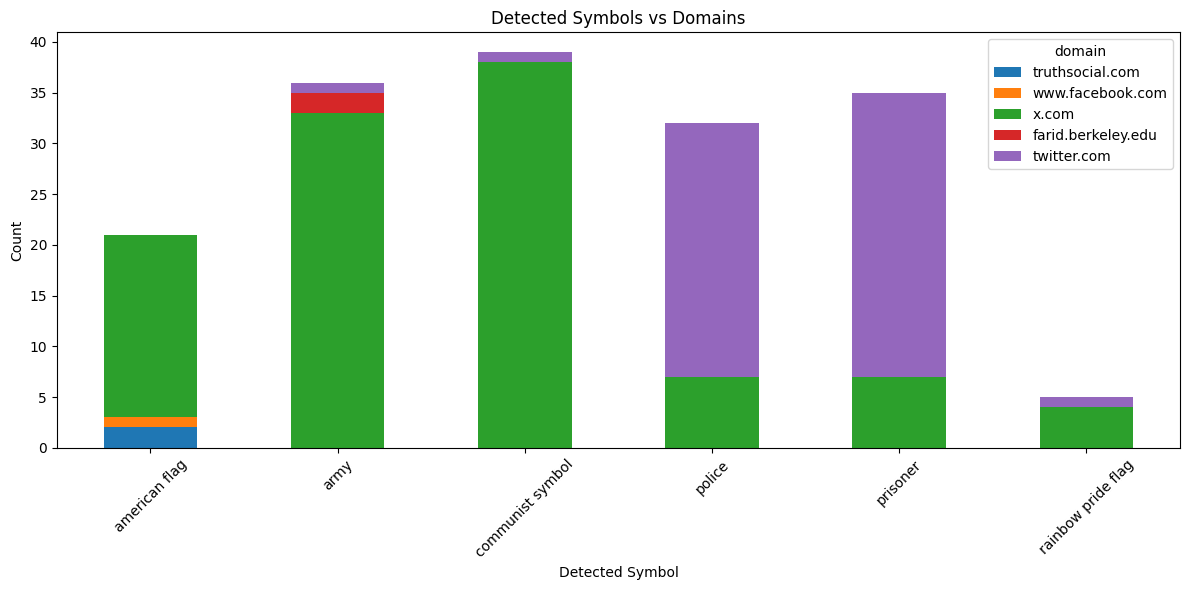

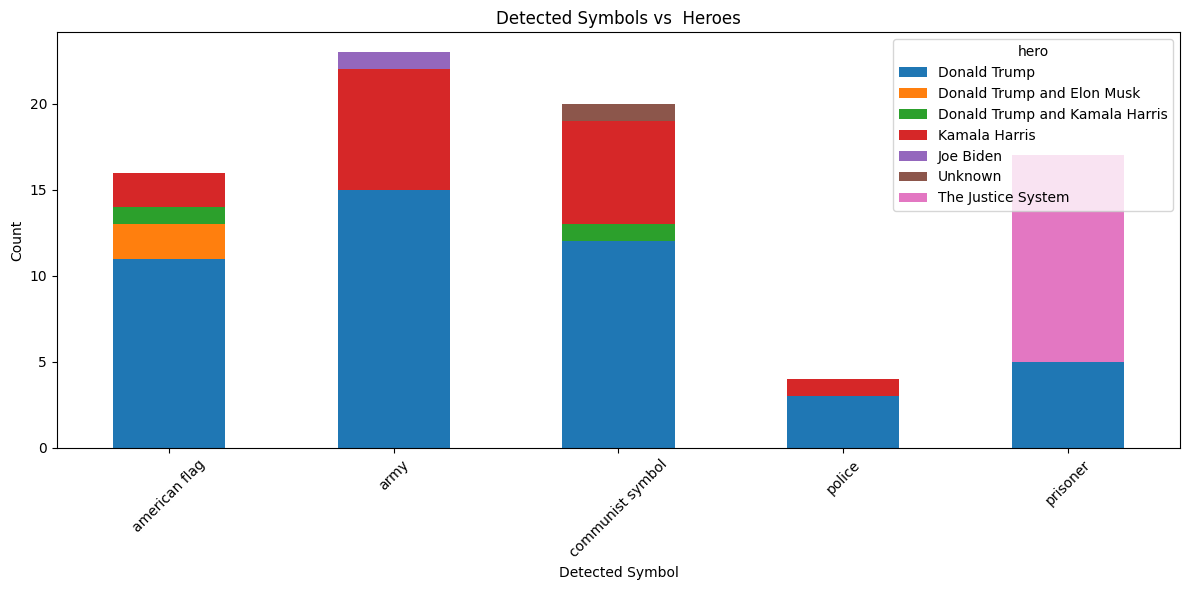

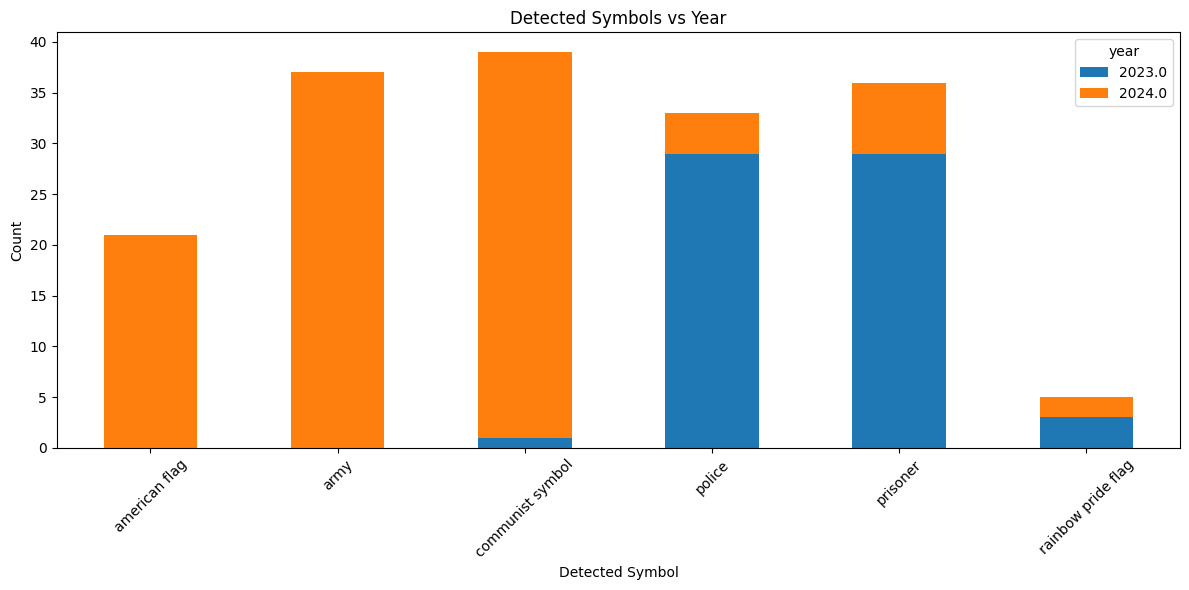

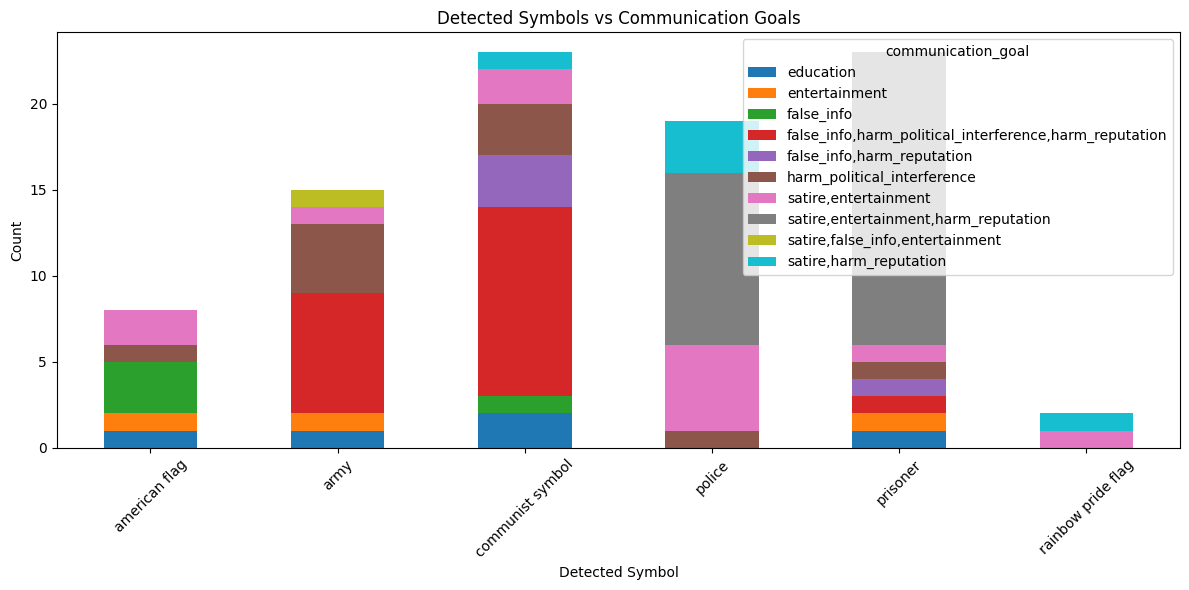

In [17]:
import matplotlib.pyplot as plt

# Step 1: Keep all symbols
# (Nothing to filter here)

# Step 2: Helper to limit secondary categories (top 10 values)
def filter_top_categories(df, group_col, top_n=10):
    top_values = df[group_col].value_counts().nlargest(top_n).index
    return df[df[group_col].isin(top_values)]

# Step 3: Filter only the second dimension (villain, domain, etc.)
villain_df = filter_top_categories(exploded_df, 'villain')
domain_df = filter_top_categories(exploded_df, 'domain')
hero_df = filter_top_categories(exploded_df, 'hero')
goal_df = filter_top_categories(exploded_df, 'communication_goal')

# Step 4: Group the data
symbol_vs_villain = villain_df.groupby(['detected_symbols', 'villain']).size().unstack(fill_value=0)
symbol_vs_domain = domain_df.groupby(['detected_symbols', 'domain']).size().unstack(fill_value=0)
symbol_vs_hero = hero_df.groupby(['detected_symbols', 'hero']).size().unstack(fill_value=0)
symbol_vs_year = exploded_df.groupby(['detected_symbols', 'year']).size().unstack(fill_value=0)  # all years
symbol_vs_goal = goal_df.groupby(['detected_symbols', 'communication_goal']).size().unstack(fill_value=0)

# Step 5: Plotting function
def plot_symbol_relationship(df, title, xlabel, ylabel='Count'):
    df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 6: Plot
plot_symbol_relationship(symbol_vs_villain, 'Detected Symbols vs Villains', 'Detected Symbol')
plot_symbol_relationship(symbol_vs_domain, 'Detected Symbols vs Domains', 'Detected Symbol')
plot_symbol_relationship(symbol_vs_hero, 'Detected Symbols vs  Heroes', 'Detected Symbol')
plot_symbol_relationship(symbol_vs_year, 'Detected Symbols vs Year', 'Detected Symbol')
plot_symbol_relationship(symbol_vs_goal, 'Detected Symbols vs Communication Goals', 'Detected Symbol')

<Axes: xlabel='villain', ylabel='detected_symbols'>

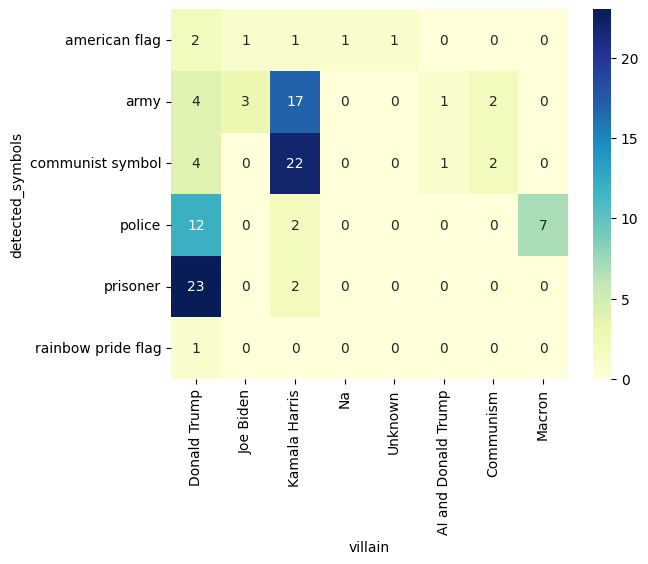

In [18]:
import seaborn as sns
sns.heatmap(symbol_vs_villain, annot=True, cmap="YlGnBu")